In [43]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

Open the zarr 'file' in write mode (new zarr)

In [53]:
example = zarr.open('test.zarr', 'w')
example

<zarr.hierarchy.Group '/'>

Create a group for our raw data

In [45]:
example.create_group('raw')
example['raw']

<zarr.hierarchy.Group '/raw'>

Create raw data in numpy

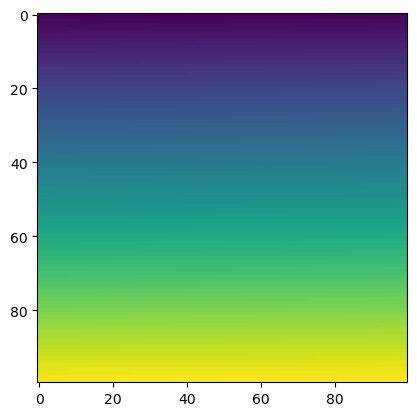

In [46]:
raw_data = np.arange(10000)
raw_data = raw_data.reshape((100, 100))
plt.imshow(raw_data)

Add raw data to zarr

In [47]:
example['raw'] = raw_data
example['raw'].shape

(100, 100)

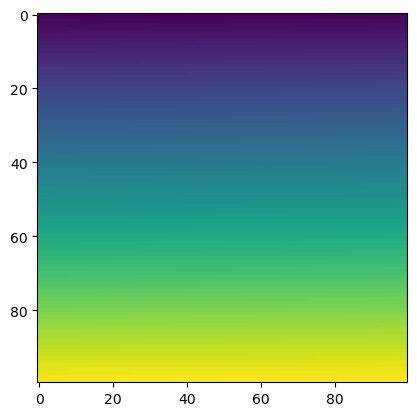

In [48]:
plt.imshow(example['raw'])

Create a mask using numpy

In [54]:
mask = np.zeros(raw_data.shape)
mask[45:55, 45:55] = 1
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Create a group using 'create_dataset' and provide data

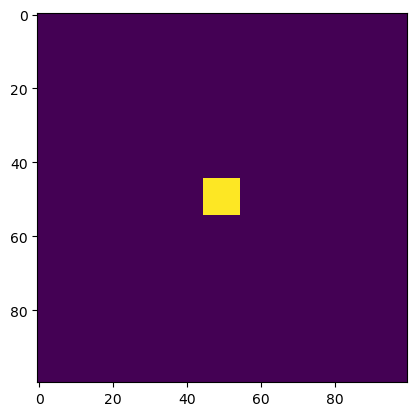

In [55]:
example.create_dataset('mask', data=mask)
plt.imshow(example['mask'])

Create an empty group with specific shape and dtype inside the zarr (initializes automatically to zeros)

In [57]:
example.create_dataset('mask2', shape=(100,100), dtype=np.float64)

<zarr.core.Array '/mask2' (100, 100) float64>

Update foreground mask values by slicing into zarr group

In [58]:
example['mask2'][60:100, 60:80] = 1

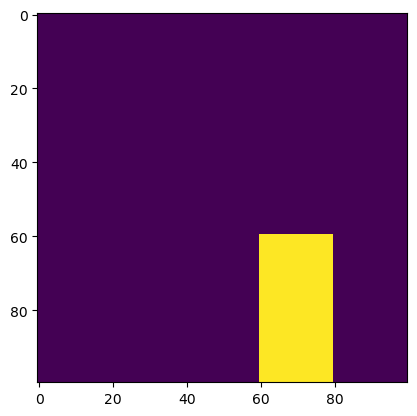

In [59]:
plt.imshow(example['mask2'])